<img src="http://www.ubu.es/sites/default/files/portal_page/images/logo_color_2l_dcha.jpg" height="200" width="200" align="right"/> 
### Author: Eduardo Tubilleja Calvo 

### Titulo: Example of base classifiers

In this notebook, we will see the example of a base classifier, that from some generated data, we train and predict them.

After this, different sklearn distances and measures are calculated, and we draw a tree to better appreciate the results.

Finally we use cross validation.


In [14]:
from sklearn_ubu.base_disturbing_neighbors import BaseDisturbingNeighbors
from sklearn_ubu.base_random_oracles import BaseRandomOracles
from sklearn_ubu.base_rotation_forest import BaseRotationForest
from sklearn.datasets import make_multilabel_classification, make_moons
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

Takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

In [3]:
seed = 0

Choose multilabel or singlelabel

In [4]:
X, y = make_multilabel_classification(
    n_samples=80, n_features=10, random_state=seed)

In [3]:
X, y=make_moons(noise=0.3, random_state=seed)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.5, train_size=0.5, random_state=seed)

Select classifier Disturbing Neighbors or Random Oracles or Rotation Forest

In [6]:
classifier = BaseDisturbingNeighbors(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

In [26]:
classifier = BaseRandomOracles(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

In [20]:
classifier=BaseRotationForest(base_estimator=DecisionTreeClassifier(
                      random_state=seed),random_state=seed)

In [7]:
classifier_train = classifier.fit(X_train, y_train)

After being fitted, the model can then be used to predict the class of samples:

In [8]:
y_predict = classifier.predict(X_test)

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [9]:
y_predict_proba = classifier.predict_proba(X_test)


Calculate different distances

In [10]:
dist_hamming = hamming_loss(y_test, y_predict)
print("Hamming Loss:", dist_hamming)

dist_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy Score:", dist_accuracy)

dist_jaccard = jaccard_similarity_score(y_test, y_predict)
print("Jaccard Similarity Score:", dist_jaccard)

dist_zero_one = zero_one_loss(y_test, y_predict)
print("Zero One Loss:", dist_zero_one)

Hamming Loss: 0.35
Accuracy Score: 0.225
Jaccard Similarity Score: 0.447916666667
Zero One Loss: 0.775


Calculate different measures

In [16]:
mea_f1 = f1_score(y_test, y_predict, average='micro')
print("F1 Score:", mea_f1)

mea_precision = precision_score(y_test, y_predict, average='micro')
print("Precision Score:", mea_precision)

mea_fbeta = fbeta_score(y_test, y_predict, average='micro', beta=0.5)
print("Fbeta Score:", mea_fbeta)

mea_recall = recall_score(y_test, y_predict, average='micro')
print("Recall Score:", mea_recall)

F1 Score: 0.551282051282
Precision Score: 0.605633802817
Fbeta Score: 0.582655826558
Recall Score: 0.505882352941


Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

    conda install python-graphviz
 
The export_graphviz exporter also supports a variety of aesthetic options. Jupyter notebooks also render these plots inline automatically:

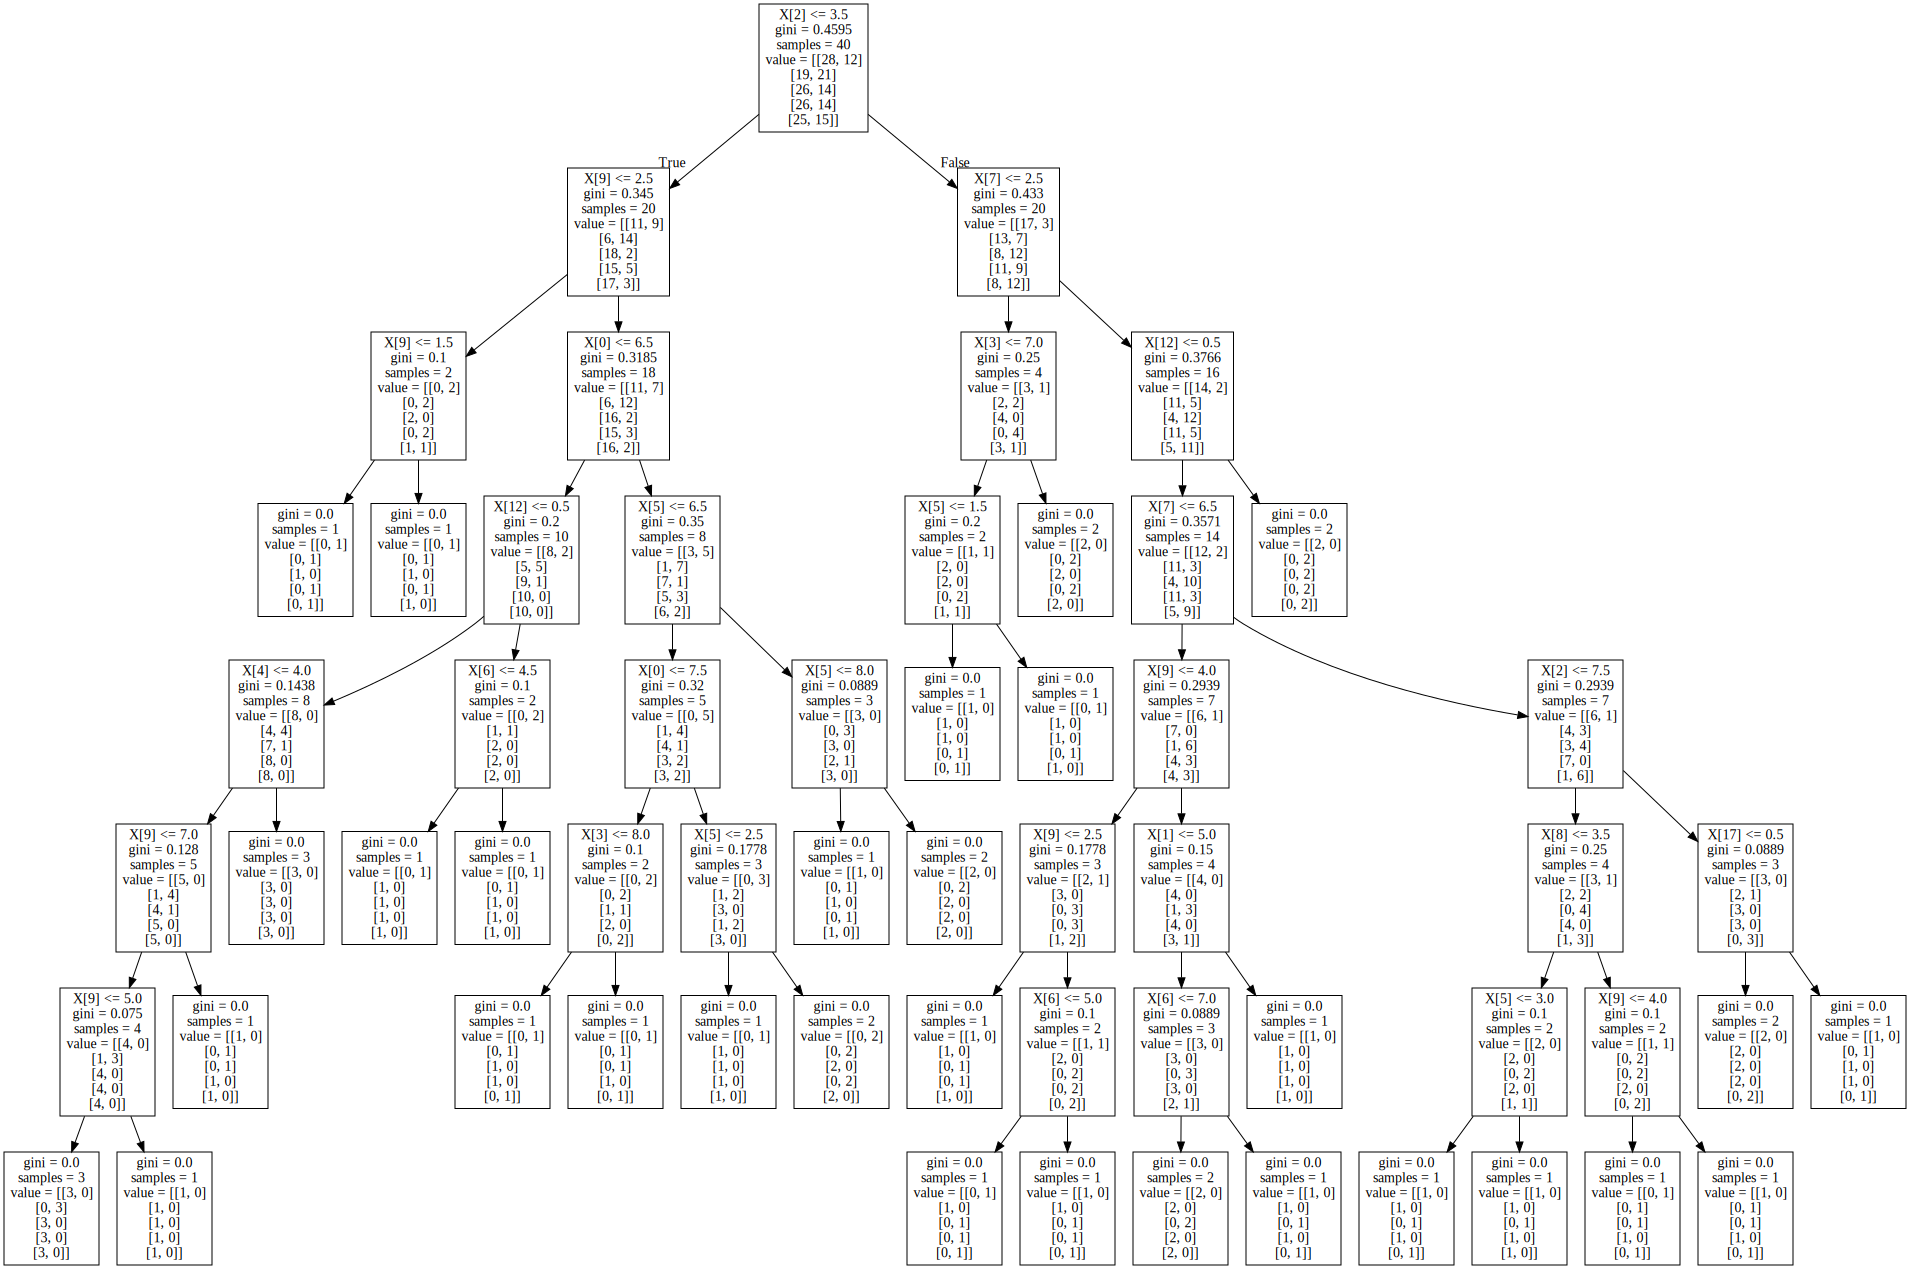

In [37]:
dot_data = export_graphviz(classifier_train, out_file=None)
graph = graphviz.Source(dot_data)
graph


In [10]:
scores = cross_val_score(classifier, X, y, cv=5)
print(scores)


[ 0.65  0.95  0.85  0.95  0.95]
